# Creating visual maps of both King County and South King County

### Goals for this notebook:
- to load all the mapping data into geopandas from an shp file.
- to filter out the puma's located within South King County and within all of King County. 
- to map these puma's such that a non-washington residents can understand where these pumas are located in relation to the rest of King County and the rest of Washington State

*puma stands for public use microdata area's*

## Our Method:

In [10]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import geopandas as gpd
import pysal as ps
# from pysal.contrib.viz import mapping as maps
%matplotlib inline

## Loading Data

We began by upploading the shp file containing all the puma's within Washington State and just gather specific info for each one of the columns. Since the PUMACE10 is the identifier for a given puma, it was of paticular importance to note that the value was being stored as an object and not an interger

In [3]:
wa_df = gpd.read_file("data/raw/tl_2017_53_puma10.shp")
wa_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 11 columns):
STATEFP10     56 non-null object
PUMACE10      56 non-null object
GEOID10       56 non-null object
NAMELSAD10    56 non-null object
MTFCC10       56 non-null object
FUNCSTAT10    56 non-null object
ALAND10       56 non-null int64
AWATER10      56 non-null int64
INTPTLAT10    56 non-null object
INTPTLON10    56 non-null object
geometry      56 non-null geometry
dtypes: geometry(1), int64(2), object(8)
memory usage: 4.9+ KB


## Cleanind Data

the filtering function below was used to assign color values based on where the puma is located. If the puma is located in South King county specifically, the function will assign it the value red, if located in king county but not south king county, then the function assigns green. Else the function assigns the color white.

In [70]:
def filtering_func(x):
    #this will be used to filter the puma values to get a simple yes or no value for the corresponding districts.
    filter_list1 = list(range(11610, 11616))
    filter_list2 = list(range(11601, 11610))
    filter_list2.append(11616)
    if any(x == filtered_num for filtered_num in filter_list1):
        return 'red'
    elif any(x == filtered_num for filtered_num in filter_list2):
        return 'green'
    else:
        return 'white'

Here we cleaned the data by switching the puma values from strings to intergers and then applied the filtering function to create a new column with each puma's corresponding color. We also sorted the table pumas.

In [71]:
wa_df['PUMACE10'] = wa_df['PUMACE10'].astype(int)
wa_df['color'] = wa_df['PUMACE10'].map(filtering_func)
wa_df.sort_values(by = ['PUMACE10'])


,STATEFP10,PUMACE10,GEOID10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry,color
1,53,10100,5310100,Whatcom County--Bellingham City PUMA,G6120,S,5459332804,1028183246,+48.8426531,-121.8364325,"POLYGON ((-122.40642 49.00230, -122.40617 49.0...",white
0,53,10200,5310200,"Skagit, Island & San Juan Counties PUMA",G6120,S,5470622131,2441658886,+48.4470835,-122.1737477,"POLYGON ((-122.44422 48.64527, -122.43685 48.6...",white
20,53,10300,5310300,Chelan & Douglas Counties PUMA,G6120,S,12277996273,266195542,+47.8211284,-120.2675436,"POLYGON ((-120.23576 47.26215, -120.23773 47.2...",white
2,53,10400,5310400,"Stevens, Okanogan, Pend Oreille & Ferry Counti...",G6120,S,29389124389,489162432,+48.5031090,-118.7866777,"POLYGON ((-118.14859 47.88667, -118.14899 47.8...",white
55,53,10501,5310501,Spokane County (North Central)--Spokane City (...,G6120,S,107035463,820891,+47.7271030,-117.4260920,"POLYGON ((-117.41117 47.68623, -117.41224 47.6...",white
21,53,10502,5310502,Spokane County (South Central)--Spokane City (...,G6120,S,207096547,1798771,+47.6373660,-117.4451805,"POLYGON ((-117.36373 47.67830, -117.36242 47.6...",white
4,53,10503,5310503,Spokane County (East Central)--Greater Spokane...,G6120,S,270926976,5004332,+47.6561281,-117.1818649,"POLYGON ((-117.15534 47.69971, -117.15509 47.6...",white
3,53,10504,5310504,Spokane County (Outer)--Cheney City PUMA,G6120,S,3983412021,35812133,+47.5972847,-117.1210417,"POLYGON ((-117.10528 47.61018, -117.10527 47.6...",white
5,53,10600,5310600,"Whitman, Asotin, Adams, Lincoln, Columbia & Ga...",G6120,S,22300152581,179320877,+46.9464148,-118.0223129,"POLYGON ((-117.38268 45.99804, -117.38543 45.9...",white
22,53,10701,5310701,"Benton & Franklin Counties--Pasco, Richland (N...",G6120,S,239800590,18718739,+46.2738284,-119.1002333,"POLYGON ((-119.10427 46.27789, -119.10455 46.2...",white


This portion of code was used to create a separate dataframe of counties that are ony located within King county

In [72]:
new_df = wa_df[(wa_df['PUMACE10']>= 11601) & (wa_df['PUMACE10']<= 11616)]

In [73]:
new_df.head()

,STATEFP10,PUMACE10,GEOID10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry,color
9,53,11612,5311612,"King County (Far Southwest)--Federal Way, Des ...",G6120,S,160638807,279665546,+47.4764651,-122.4271168,"POLYGON ((-122.33587 47.26382, -122.33676 47.2...",red
32,53,11616,5311616,"King County (Northeast)--Snoqualmie City, Cott...",G6120,S,2477645989,49838932,+47.5779171,-121.6433869,"POLYGON ((-121.87736 47.50068, -121.87745 47.5...",green
35,53,11611,5311611,"King County (West Central)--Burien, SeaTac, Tu...",G6120,S,104685305,6835973,+47.4500687,-122.3101564,"POLYGON ((-122.26541 47.48933, -122.26516 47.4...",red
36,53,11605,5311605,Seattle City (West)--Duwamish & Beacon Hill PUMA,G6120,S,70104140,10124676,+47.5521279,-122.3523950,"POLYGON ((-122.32246 47.59583, -122.32147 47.5...",green
37,53,11603,5311603,Seattle City (Downtown)--Queen Anne & Magnolia...,G6120,S,29279826,8323991,+47.6391415,-122.3720415,"POLYGON ((-122.32238 47.65293, -122.32234 47.6...",green


## Plotting the Data

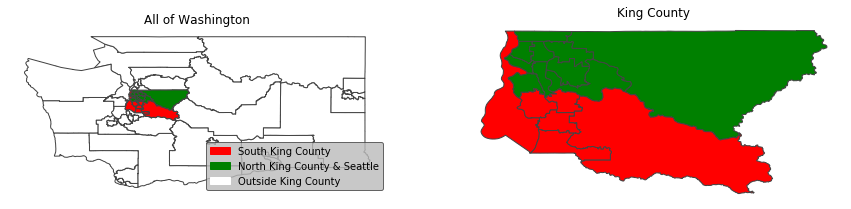

In [103]:
f, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,6))

ax[0] = wa_df.plot(ax=ax[0], color = wa_df['color'], edgecolor = '#444444')
ax[0].set_axis_off()

ax[1] = new_df.plot(ax=ax[1], color = new_df['color'], edgecolor = '#444444')
ax[1].set_axis_off()

red_patch = mpatches.Patch(color='red', label='South King County')
green_patch = mpatches.Patch(color='green', label='North King County & Seattle')
blue_patch = mpatches.Patch(color='white', label='Outside King County')

ax[0].title.set_text("All of Washington")
ax[1].title.set_text("King County")

ax[0].legend(handles=[red_patch, green_patch, blue_patch], loc = 4, prop = {'size': 10}, edgecolor = '#444444', facecolor = '#bbbbbb')